# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases

# Create two new dataframes
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import pandas as pd
import numpy as np
# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")



In [2]:
north_df.shape
north_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [3]:
south_df.shape
south_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
no_north_rep=north_df["Rep ID"].nunique()
print("numberof reps in north branch:",no_north_rep)


numberof reps in north branch: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
no_south_rep=south_df["Rep ID"].nunique()

print("number of reps in south branch:",no_south_rep)


number of reps in south branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
avg_busy_min=north_df["Busy Minutes"].mean().round(2)
avg_not_ready_minutes=north_df["Not Ready Minutes"].mean().round(2)
avg_incoming_wait_time=north_df["Incoming Wait Time"].mean().round(2)
avg_during_call_wait_time=north_df["During Call Wait Time"].mean().round(2)
print("average busy minutes :        ",avg_busy_min)
print("average not ready minutes:    ",avg_not_ready_minutes)
print("average incoming wait time:   ",avg_incoming_wait_time)
print("average dueing call wait time:  ",avg_during_call_wait_time)

average busy minutes :         9.99
average not ready minutes:     1.91
average incoming wait time:    3.05
average dueing call wait time:   2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
avg_busy_min_south=south_df["Busy Minutes"].mean().round(2)
avg_not_ready_minutes_south=south_df["Not Ready Minutes"].mean().round(2)
avg_incoming_wait_time_south=south_df["Incoming Wait Time"].mean().round(2)
avg_during_call_wait_time_south=south_df["During Call Wait Time"].mean().round(2)
print("average busy minutes:          ",avg_busy_min_south)
print("average not rady minutes:      ",avg_not_ready_minutes_south)
print("average incoming wait time:    ",avg_incoming_wait_time_south)
print("average during call wait time: ",avg_during_call_wait_time_south)


average busy minutes:           10.05
average not rady minutes:       1.91
average incoming wait time:     3.0
average during call wait time:  3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used:
no_of_calls_north=north_df.groupby("Time Block").aggregate({'Calls':'sum'})
print("no of calls north:",no_of_calls_north)
no_of_calls_south=south_df.groupby("Time Block").aggregate({'Calls':'sum'})
print("no of calls south:",no_of_calls_south)

print("total no of call taken by all branches",(no_of_calls_north+no_of_calls_south))
 


no of calls north:             Calls
Time Block       
10:00 AM       43
11:00 AM       25
12:00 PM       45
1:00 PM        17
2:00 PM        35
3:00 PM        30
4:00 PM        28
5:00 PM        17
9:00 AM         5
no of calls south:             Calls
Time Block       
10:00 AM       56
11:00 AM       31
12:00 PM       75
1:00 PM        23
2:00 PM        30
3:00 PM        43
4:00 PM        25
5:00 PM        26
9:00 AM         5
total no of call taken by all branches             Calls
Time Block       
10:00 AM       99
11:00 AM       56
12:00 PM      120
1:00 PM        40
2:00 PM        65
3:00 PM        73
4:00 PM        53
5:00 PM        43
9:00 AM        10


#### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = numberof reps in north branch: 9
- 1b) Reps in the South Branch = number of reps in south branch: 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes =  10.05
> - Not Ready Minutes = 1.01
> - Incoming Wait Time = 3.0
> - During Call Wait Time =3.08 

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43


## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 
yes, there is 63% missing data incoming wait time, that is only for outgoing calls. we can ignore that because incoming wait time does not apply to outgoing calls



In [9]:
# Code Used missing values
# Add Additional Cells as needed.
print(north_df.isnull().sum())
print(south_df.isnull().sum())

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


(245, 15)


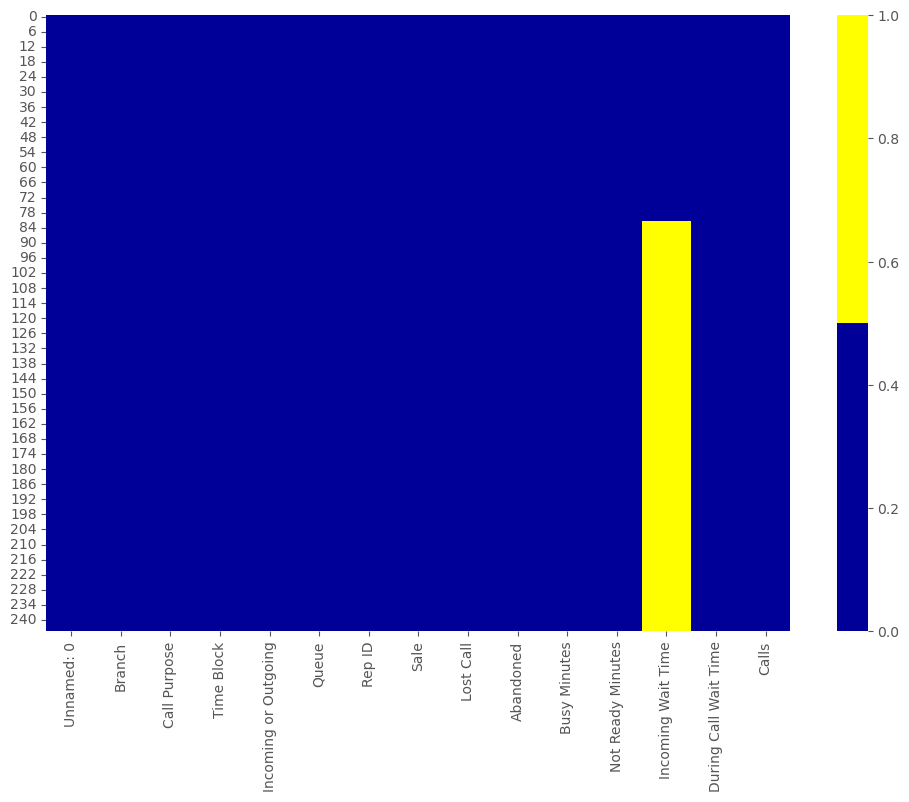

In [10]:
cols = north_df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)

(314, 15)


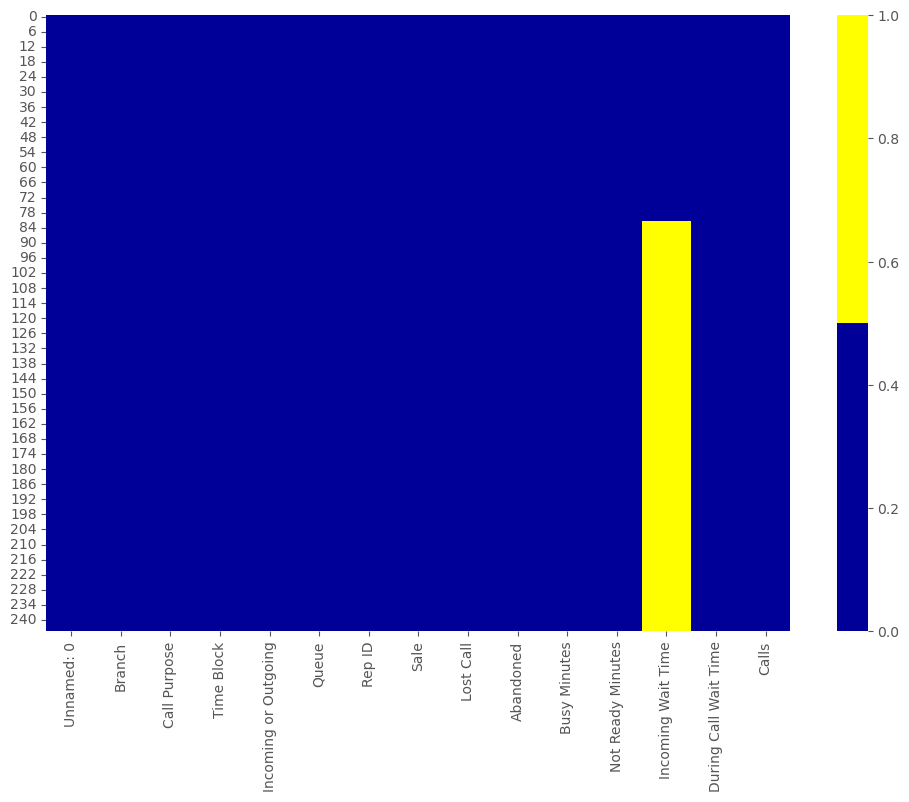

In [11]:
cols = south_df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)

In [12]:
north_dffill = north_df['Incoming Wait Time'].fillna(north_df['Incoming Wait Time'].mean(),inplace = True)
# north_dfre.value_counts()

north_df['Incoming Wait Time'].value_counts()

3.04878    163
4.00000     20
1.00000     17
5.00000     17
2.00000     16
3.00000     12
Name: Incoming Wait Time, dtype: int64

In [13]:
south_dfill=south_df['Incoming Wait Time'].fillna(south_df['Incoming Wait Time'].mean(),inplace=True)

south_df['Incoming Wait Time'].value_counts()

3.0    217
4.0     30
2.0     28
1.0     20
5.0     19
Name: Incoming Wait Time, dtype: int64

(245, 15)


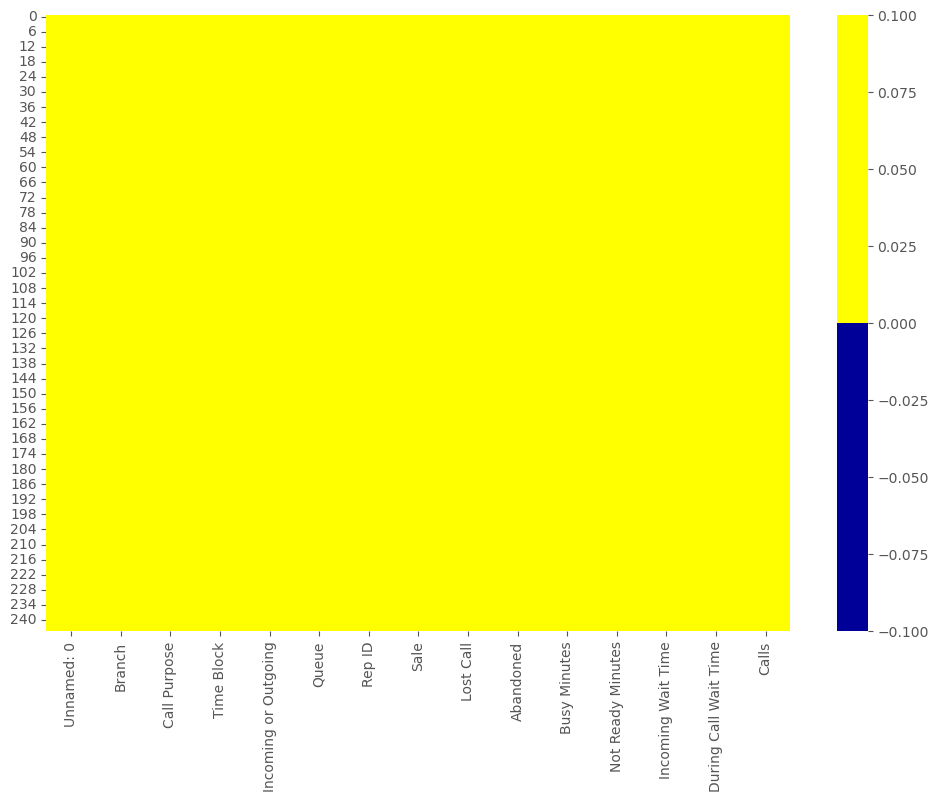

In [14]:
cols = north_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)

(314, 15)


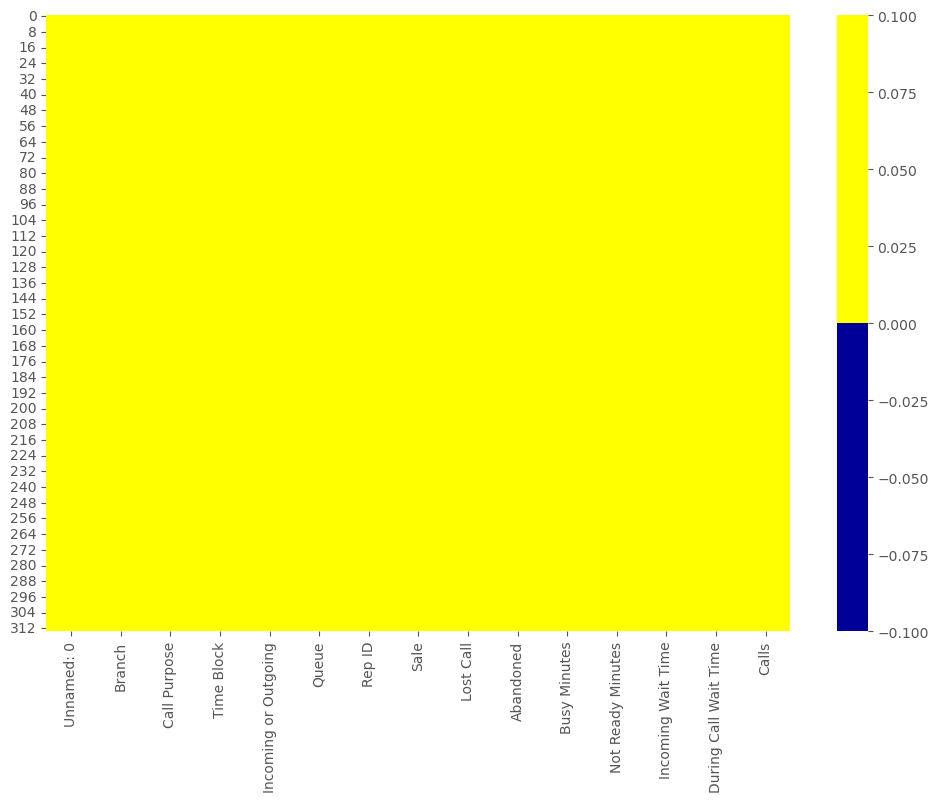

In [15]:
cols = south_df.columns[:15] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Two outgoing sale calls from Lilly at 10 AM look like duplicates. one of the records can be dropped.

In [16]:
#Code Used
# Add Additional Cells as needed.



In [17]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [18]:
 north_df=north_df.replace({'Sale':{'NO':False,'Yes':True}})

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates

In [19]:
#Code Used
# Add Additional Cells as needed.
print(north_df.duplicated().sum())
print(south_df.duplicated().sum())

0
0


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: lost call and During wait time were not used in this analysis. I ignored these two columns. 

In [21]:
#Code Used
# Add Additional Cells as needed.
#north_df_missing =  
#drop_unncessary_north = north_df_missing.drop('Unnamed: 0', axis=1)
#drop_unncessary_south = south_df_missing.drop('Unnamed: 0', axis=1)
#print(drop_unncessary_north.shape)
#print(drop_unncessary_south.shape)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [22]:
# Create dataframe for the entire company named df
df = pd.concat([north_df,south_df],keys =['ndf','sdf'])
df



Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
ndf 0             0  North        Complaint    9:00 AM             Incoming   
    1             1  North    Sales Support   11:00 AM             Incoming   
    2             2  North    Sales Support   11:00 AM             Incoming   
    3             3  North    Sales Support    4:00 PM             Incoming   
    4             4  North  Product Support   12:00 PM             Incoming   
...             ...    ...              ...        ...                  ...   
sdf 309         309  South  Product Support    5:00 PM             Outgoing   
    310         310  South  Product Support    5:00 PM             Outgoing   
    311         311  South  Product Support    5:00 PM             Outgoing   
    312         312  South  Product Support    5:00 PM             Outgoing   
    313         313  South  Product Support    5:00 PM             Outgoing   

        Queue  Rep ID   Sale  Lost Call  Abandoned  Busy Minutes  \
ndf 0       B   Brent  False          0          1             9   
    1       A     Cam  False          0          0            11   
    2       B    Todd  False          0          0             9   
    3       B   Brent  False          0          0            11   
    4       B   Brent  False          0          0             8   
...       ...     ...    ...        ...        ...           ...   
sdf 309     D   Helga     NO          0          0            10   
    310     C   Susan     NO          0          0            12   
    311     C   Sandy     NO          0          0             9   
    312     C    Eric     NO          0          0            10   
    313     D  George     NO          0          0            10   

         Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls  
ndf 0                    2                 1.0                      4      1  
    1                    1                 1.0                      3      1  
    2                    3                 1.0                      3      1  
    3                    2                 1.0                      4      1  
    4                    2                 1.0                      4      1  
...                    ...                 ...                    ...    ...  
sdf 309                  3                 3.0                      4      1  
    310                  3                 3.0                      4      1  
    311                  3                 3.0                      4      1  
    312                  1                 3.0                      2      1  
    313                  2                 3.0                      3      1  

[559 rows x 15 columns]

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:

- North Branch = Brent, 37 
- South Branch = Eric, 35


In [23]:
# Code Used
#df = df.drop(["Unnamed: 0"],axis = 1)
df[['Rep ID', 'Branch','Calls']].groupby(['Rep ID', 'Branch']).count().sort_values(by = ['Calls', 'Branch', 'Rep ID'], ascending=False)

,,Calls
Rep ID,Branch,
Brent,North,37
Eric,South,35
Randy,South,33
Sandy,South,32
Helga,South,31
Lilly,North,30
Kate,South,29
George,South,29
Todd,North,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, Sounth Branch and Company wide

In [24]:
# Code Used
print("Average by branch: \n", df[['Abandoned', 'Branch']].groupby('Branch').mean())
print("Average total: \n", df['Abandoned'].mean())

Average by branch: 
         Abandoned
Branch           
North    0.028571
South    0.012739
Average total: 
 0.01967799642218247


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%, 33 calls
- South Branch = 15.29%, 48 calls
- Company Wide = 14.49%, 81 calls

In [26]:
# Code Used
total = df.shape[0]

no_of_calls = df[df['Incoming Wait Time']<=2.0].shape[0]
print(no_of_calls)

per_of_calls = (no_of_calls/total)*100
print(per_of_calls)

81
14.490161001788909


In [27]:
# Code Used - North branch
total = north_df.shape[0]
no_of_calls = north_df[north_df['Incoming Wait Time']<=2.0].shape[0]
print(no_of_calls)

per_of_calls = (no_of_calls/total)*100
print(per_of_calls)

33
13.46938775510204


In [28]:
# Code Used - South branch
total = south_df.shape[0]
no_of_calls = south_df[south_df['Incoming Wait Time']<=2.0].shape[0]
print(no_of_calls)

per_of_calls = (no_of_calls/total)*100
print(per_of_calls)

48
15.286624203821656


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [29]:
# Code Used 
print('Avg speed by branch\n', df[['Incoming Wait Time', 'Branch']].groupby('Branch').mean())

print('Avg speed\n', df['Incoming Wait Time'].mean())

Avg speed by branch
         Incoming Wait Time
Branch                    
North              3.04878
South              3.00000
Avg speed
 3.0213796413456087


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar graphs, these are most useful when there are big changes or to show how one group compares against other groups.

C:\Users\13148\AppData\Local\Temp\ipykernel_24112\958323516.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


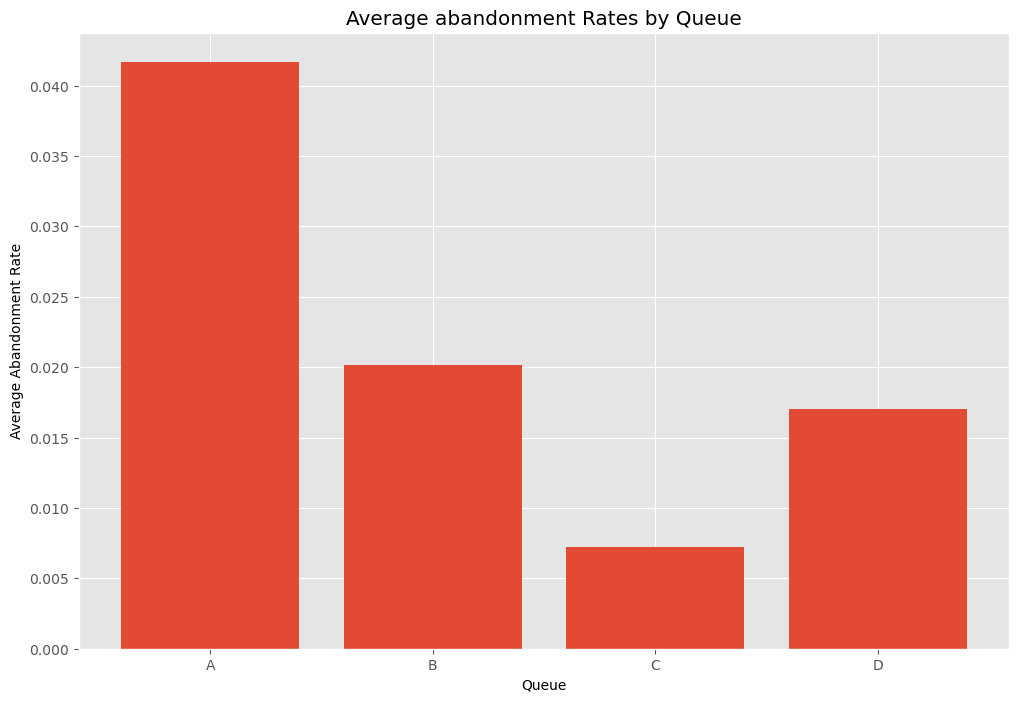

In [31]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
#calculating average ababdonment rate for each queue - using list comprehension
avg_abandonment_rates = [abandonment_rates[queue] for queue in queues]
plt.title("Average abandonment Rates by Queue") 
plt.bar(queues,avg_abandonment_rates)
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")                       
plt.show()                       
                         



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: bar chart.
A bar chart also makes it easy to see comparisions and person's usuage.
These are most useful when there are big changes or to show how one group compares against other groups

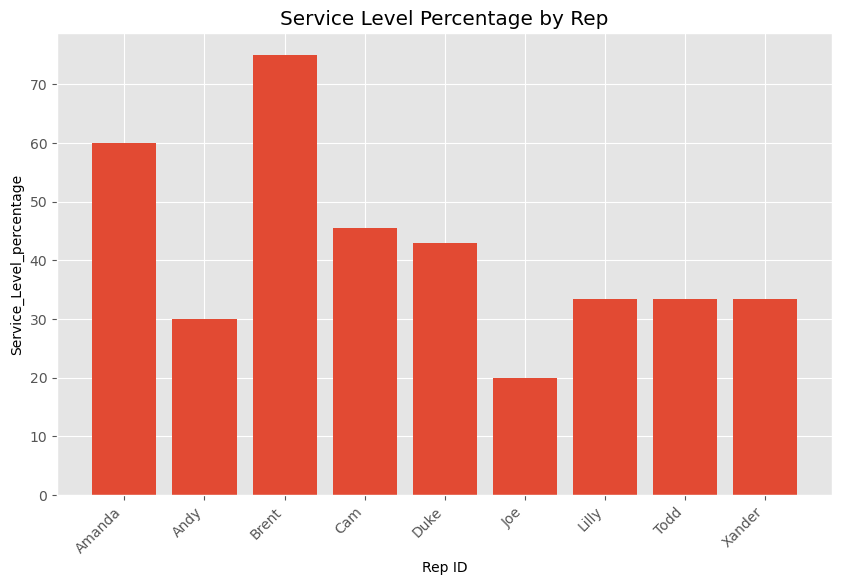

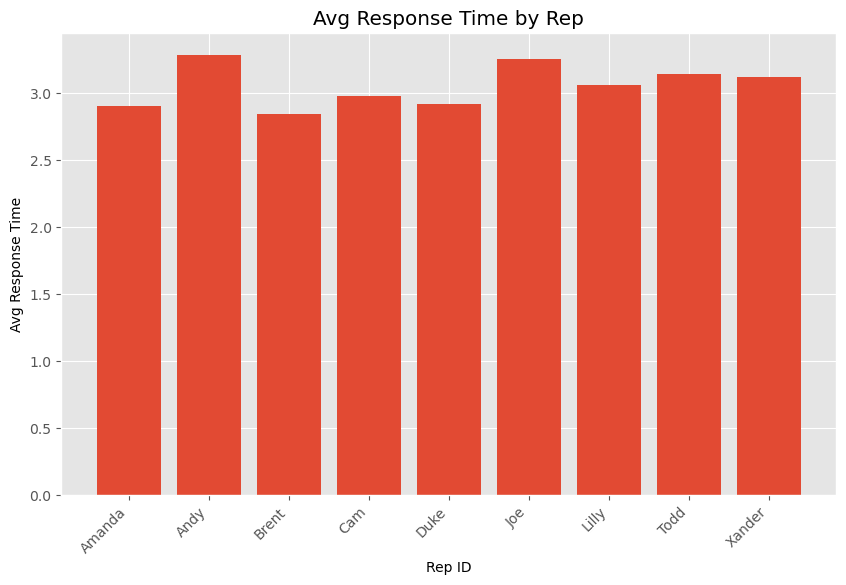

In [32]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
#print(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
#print(quick_reps)
quick_stats = quick_reps.groupby(["Rep ID"]).sum() 
#print(quick_stats)

#quick_stats# Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
#print(total_stats)


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
#print(service_level)

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
#print(service_level)
slevel = service_level.reset_index()
#print(service_level)
#print(slevel)
#Your Code Here:

#Chart for Service level
plt.figure(figsize=(10,6))
plt.bar(slevel['Rep ID'], slevel['Service Level %'])
plt.xlabel('Rep ID')
plt.ylabel('Service_Level_percentage')
plt.title('Service Level Percentage by Rep')
plt.xticks(rotation=45, ha ='right')
plt.show()


#Chart for average response time
plt.figure(figsize=(10,6))
plt.bar(north_plt['Rep ID'], north_plt['Incoming Wait Time'])
plt.xlabel('Rep ID')
plt.ylabel('Avg Response Time')
plt.title('Avg Response Time by Rep')
plt.xticks(rotation=45, ha ='right')
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Stacked bar charts are good for comparing categorical data. It is easier to understand one bar chart instead of 3 pie charts

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


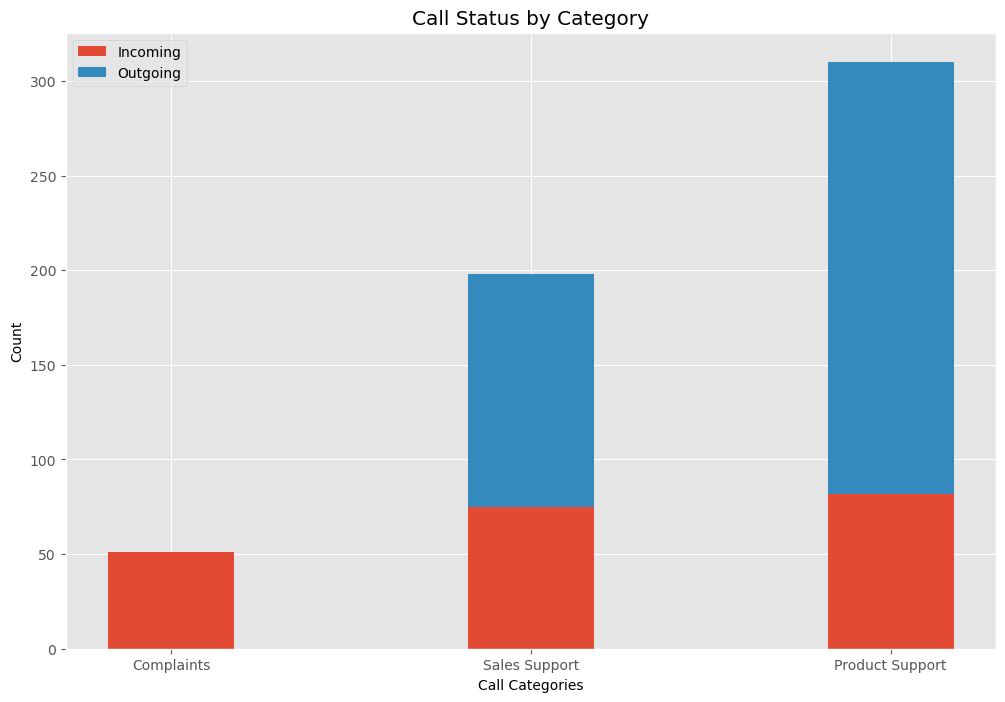

In [33]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
call_data = {
    "Complaints": complaints,
    "Sales Support": sales_support,
    "Product Support": product_support
}

categories = list(call_data.keys())
incoming_counts = [item["Incoming"] for item in call_data.values()]
outgoing_counts = [item.get("Outgoing", 0) for item in call_data.values()]

# Create a stacked bar chart
fig, ax = plt.subplots()

# Plot success and fail data as stacked bars
bar_width = 0.35
indices = np.arange(len(categories))
ax.bar(indices, incoming_counts, bar_width, label='Incoming')
ax.bar(indices, outgoing_counts, bar_width, bottom=incoming_counts, label='Outgoing')

# Add labels and title
ax.set_xlabel('Call Categories')
ax.set_ylabel('Count')
ax.set_title('Call Status by Category')
ax.set_xticks(indices)
ax.set_xticklabels(categories)
ax.legend()

# Show the stacked bar chart
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer:  South is oparating efficiently - abandoned rate is lower and service level is higher, 
average speed is lower



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North would benefit more


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
Time blocks are in hours. it's not clear if there are multiple calls in each block or if there are duplicates


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: